# Ejemplo de árboles de decisión 
Los contenidos de este notebook están basados en el ejemplo del siguiente vídeo: https://www.youtube.com/watch?v=zs6yHVtxyv8

El objetivo es predecir el voto (republicano o demócrata) de un determinado elector en base a sus ingresos, nivel educativo, diversidad racial. 

Veamos cómo funciona un árbol de decisión con solo estas tres variables.

In [ ]:
#pip install -U pydotplus

In [5]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.tree import export_graphviz,plot_tree
from six import StringIO
from IPython.display import Image  
import pydotplus
import collections

El siguiente conjunto de sentencias son para construir nuestro dataset.

In [6]:
# cargamos los datos en un dataframe
json_string = '{"State":{"0":"California","1":"Colorado","2":"Connecticut","3":"Delaware","4":"D.C.","5":"Hawaii","6":"Illinois","7":"Maine","8":"Maryland","9":"Massachusetts","10":"Michigan","11":"Minnesota","12":"Nevada","13":"New Hampshire","14":"New Jersey","15":"New Mexico","16":"New York","17":"Oregon","18":"Rhode Island","19":"Vermont","20":"Virginia","21":"Washington","22":"Pennsylvania","23":"Wisconsin","24":"Alabama","25":"Alaska","26":"Arizona","27":"Arkansas","28":"Florida","29":"Georgia","30":"Idaho","31":"Indiana","32":"Iowa","33":"Kansas","34":"Kentucky","35":"Louisiana","36":"Mississippi","37":"Missouri","38":"Montana","39":"Nebraska","40":"North Carolina","41":"North Dakota","42":"Ohio","43":"Oklahoma","44":"South Carolina","45":"South Dakota","46":"Tennessee","47":"Texas","48":"Utah","49":"West Virginia","50":"Wyoming"},"Median_income":{"0":70489,"1":73034,"2":72812,"3":65012,"4":85750,"5":80108,"6":70145,"7":58663,"8":86223,"9":86345,"10":60449,"11":71817,"12":61864,"13":81346,"14":74176,"15":48283,"16":67274,"17":69165,"18":62266,"19":70066,"20":77151,"21":79726,"22":64524,"23":62629,"24":49936,"25":68734,"26":62283,"27":49781,"28":54644,"29":55821,"30":58728,"31":59892,"32":68718,"33":63938,"34":54555,"35":49973,"36":42781,"37":61726,"38":57679,"39":67575,"40":53369,"41":66505,"42":61633,"43":54434,"44":57444,"45":59463,"46":56060,"47":59785,"48":77067,"49":50573,"50":62539},"%_Bachelors_degree_or_higher":{"0":0.33,"1":0.39,"2":0.38,"3":0.31,"4":0.57,"5":0.32,"6":0.33,"7":0.3,"8":0.39,"9":0.42,"10":0.28,"11":0.35,"12":0.24,"13":0.36,"14":0.38,"15":0.27,"16":0.35,"17":0.32,"18":0.33,"19":0.37,"20":0.38,"21":0.35,"22":0.3,"23":0.29,"24":0.25,"25":0.29,"26":0.28,"27":0.22,"28":0.29,"29":0.3,"30":0.27,"31":0.25,"32":0.28,"33":0.32,"34":0.23,"35":0.23,"36":0.21,"37":0.28,"38":0.31,"39":0.31,"40":0.3,"41":0.29,"42":0.27,"43":0.25,"44":0.27,"45":0.28,"46":0.26,"47":0.29,"48":0.33,"49":0.2,"50":0.27},"%_White":{"0":0.37,"1":0.68,"2":0.66,"3":0.62,"4":0.37,"5":0.21,"6":0.61,"7":0.93,"8":0.5,"9":0.71,"10":0.75,"11":0.8,"12":0.49,"13":0.9,"14":0.55,"15":0.37,"16":0.55,"17":0.75,"18":0.72,"19":0.93,"20":0.62,"21":0.68,"22":0.76,"23":0.81,"24":0.66,"25":0.6,"26":0.54,"27":0.72,"28":0.53,"29":0.52,"30":0.82,"31":0.79,"32":0.86,"33":0.76,"34":0.85,"35":0.59,"36":0.57,"37":0.8,"38":0.86,"39":0.79,"40":0.63,"41":0.84,"42":0.79,"43":0.65,"44":0.64,"45":0.82,"46":0.74,"47":0.41,"48":0.78,"49":0.92,"50":0.84},"Political_Leaning":{"0":0,"1":0,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0,"8":0,"9":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":2,"23":2,"24":1,"25":1,"26":1,"27":1,"28":1,"29":1,"30":1,"31":1,"32":1,"33":1,"34":1,"35":1,"36":1,"37":1,"38":1,"39":1,"40":1,"41":1,"42":1,"43":1,"44":1,"45":1,"46":1,"47":1,"48":1,"49":1,"50":1}}'
df = pd.read_json(json_string)
df

C:\Users\Oscar\AppData\Local\Temp\ipykernel_19680\2895212539.py:3: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(json_string)


,State,Median_income,%_Bachelors_degree_or_higher,%_White,Political_Leaning
0,California,70489,0.33,0.37,0
1,Colorado,73034,0.39,0.68,0
2,Connecticut,72812,0.38,0.66,0
3,Delaware,65012,0.31,0.62,0
4,D.C.,85750,0.57,0.37,0
5,Hawaii,80108,0.32,0.21,0
6,Illinois,70145,0.33,0.61,0
7,Maine,58663,0.30,0.93,0
8,Maryland,86223,0.39,0.50,0
9,Massachusetts,86345,0.42,0.71,0


In [7]:
# transformación de variables para tener variables categóricas a partir de los datos.
df['income'] = df['Median_income']>df['Median_income'].median()
df['education'] = df['%_Bachelors_degree_or_higher']>df['%_Bachelors_degree_or_higher'].median()
df['diversity'] = df['%_White']<df['%_White'].median()
df

,State,Median_income,%_Bachelors_degree_or_higher,%_White,Political_Leaning,income,education,diversity
0,California,70489,0.33,0.37,0,True,True,True
1,Colorado,73034,0.39,0.68,0,True,True,True
2,Connecticut,72812,0.38,0.66,0,True,True,True
3,Delaware,65012,0.31,0.62,0,True,True,True
4,D.C.,85750,0.57,0.37,0,True,True,True
5,Hawaii,80108,0.32,0.21,0,True,True,True
6,Illinois,70145,0.33,0.61,0,True,True,True
7,Maine,58663,0.30,0.93,0,False,False,False
8,Maryland,86223,0.39,0.50,0,True,True,True
9,Massachusetts,86345,0.42,0.71,0,True,True,False


In [8]:
feature_cols = ['income','education','diversity']
X = df[feature_cols] # Características
y = df.Political_Leaning # Variable objetivo


In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [10]:
# Creamos el objeto DTC
clf = DecisionTreeClassifier(criterion="entropy")

# Entrenamos el modelo
clf = clf.fit(X_train,y_train)

# Realizamos predicciones
y_pred = clf.predict(X_test)

In [12]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8076923076923077


**Controlar la complejidad de los árboles de decision**

Construir un árbol de decisión tal y como hemos explicado hasta alcanzar hojas puras se traduce en modelos muy complejos y muy ajustados a los datos.

Que existan hojas puras, significa que hay un 100% de exactitud (accuracy) en los datos de entrenamiento; cada instancia de datos del conjunto de entrenamiento está en una hoja correcta. Esto nos lleva a tener un sobreajuste en el entrenamiento, que posteriormente se traducirá en que el modelo no será capaz de generalizar el aprendizaje.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy para datos de entrenamiento: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy para datos de test: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy para datos de entrenamiento: 1.000
Accuracy para datos de test: 0.937


El sobreajuste aparece cuando entrenamos un modelo de manera muy específica con unos datos. En los árboles es especialmente delicado, ya que si el árbol crece demasiado aparecerá el sobreajuste. Un modelo con sobreajuste será un modelo que no será capaz de hacer predicciones cuando lleguen datos diferentes a los ya conocidos.

Por lo tanto, existe sobreajuste si obtenemos un conjunto de reglas de clasificación o decisión que funciona muy bien en el entrenamiento pero el algoritmo no es capaz de generalizar los resultados.

El problema del sobreajuste se considera cuando el algoritmo continúa profundizando cada vez más para reducir el error del conjunto de entrenamiento, pero da como resultado un error mayor del conjunto de prueba.

_Para evalúar si hay sobre ajuste comparamos accuracy en training y test._

Si el rendimiento del modelo en el conjunto de datos de entrenamiento es **significativamente** mejor que el rendimiento en el conjunto de datos de test, es posible que el modelo se haya sobreajustado al conjunto de datos de entrenamiento.

In [14]:
# para los datos de predicción de voto

print('Training set score: {:.4f}'.format(clf.score(X_train[:, :3], y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test[:, :3], y_test)))

Training set score: 0.3732
Test set score: 0.3706


c:\Users\Oscar\anaconda3\envs\cursoMachineLearning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Oscar\anaconda3\envs\cursoMachineLearning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Reducir overfitting**

* Las técnicas de prepoda: Tratan de detener el crecimiento natural del árbol, que se produce al aplicar el algoritmo antes de que su nivel de ajuste sea muy elevado.

* Las técnicas de pospoda: Permiten que el árbol crezca y, posteriormente, se realice una poda sobre aquellos nodos que aportan poca información.

Algunos criterios para realizar la prepoda: limitar la profundidad máxima del árbol, requerir un mínimo número de instancias en un nodo para que sea particionado o limitar el número máximo de hojas.

scikit-learn *solo* tiene implementadas las técnicas de prepoda.

In [15]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy para datos de entrenamiento: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy para datos de test: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy para datos de entrenamiento: 0.988
Accuracy para datos de test: 0.951


[Text(0.5555555555555556, 0.875, 'x[1] <= 0.5\nentropy = 0.943\nsamples = 25\nvalue = [16, 9]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 0.5\nentropy = 0.918\nsamples = 12\nvalue = [4, 8]'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'x[2] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.625, 'x[2] <= 0.5\nentropy = 0.391\nsamples = 13\nvalue = [12, 1]'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.8888888888888888, 

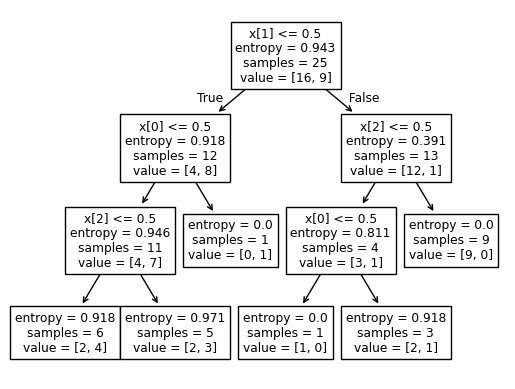

In [16]:
# Visualización de los árboles
plot_tree(clf)

In [ ]:
#!pip install -U graphviz
#!pip install -U pydotplus
#%pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [17]:
import graphviz
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])


In [18]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

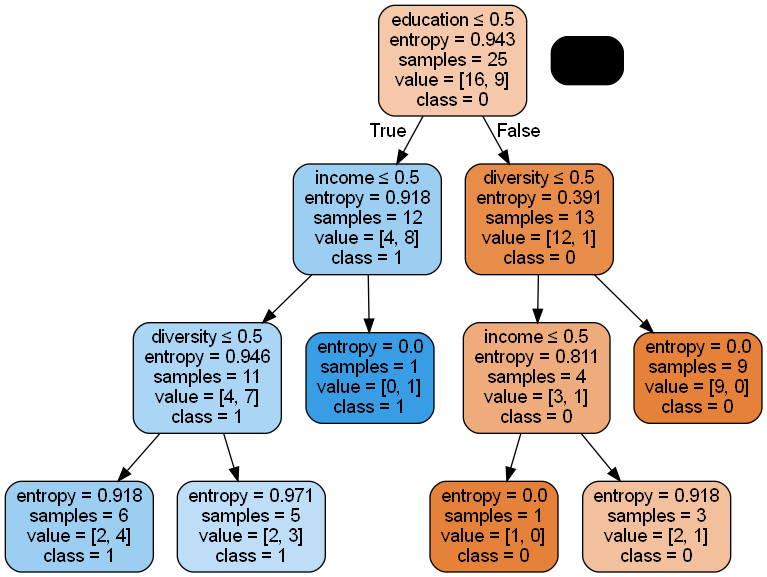

In [19]:
from IPython.display import Image, display

# Mostrar el gráfico directamente en el notebook
display(Image(graph.create_png()))

